<a href="https://colab.research.google.com/github/fernandocillo/EG940/blob/main/STFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [37]:
fs = 40000
Ts= 1/fs
f0 = 400
n = np.arange(800) 
x1 = np.cos(2 * np.pi * f0 * n * Ts)
x2 = np.cos(2 * np.pi * 2*f0 * n * Ts)
xn = np.hstack((x1,x2)) #concatena senoides

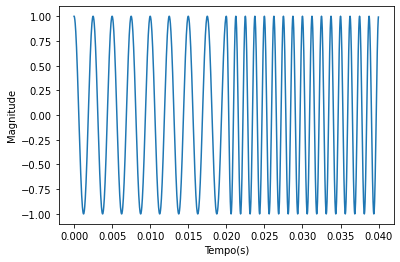

In [38]:
plt.figure()
plt.plot(np.arange(len(xn))*Ts, xn, label='Sinal amostrado')
plt.ylabel('Magnitude')
plt.xlabel('Tempo(s)')
plt.show()

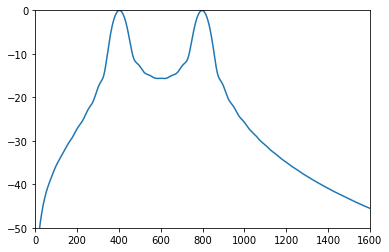

In [39]:
w=np.hanning(len(xn))

xk = 20*np.log10(np.abs(np.fft.rfft(xn*w, len(xn)*10)))
xk -= np.max(xk)
freqs = np.arange(len(xk))
freqs = freqs * fs * 0.5/len(freqs)
plt.figure()
plt.plot(freqs, xk)
plt.xlim([000, 1600])
plt.ylim([-50, 0])
plt.show()

In [40]:
import librosa

In [41]:
#Short-Time Fourier Transform
S = librosa.stft(xn, n_fft=320, hop_length=10, win_length=320) 
S = np.abs(S)

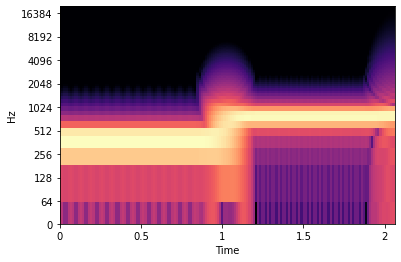

In [42]:
import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=fs)